# Work with PyTorch Datasets
---

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

---

## Custom dataset

### Creating of dataset
PyTorch provides easy mechanism to work with datasets. You just need to inherit from `torch.utils.data.Dataset` and override 2 methods:
 - `__len__` in a way that len(dataset) returns the size of the dataset.
 - `__getitem__` to support the indexing such that dataset[i] can be used to get ith sample

In [2]:
import numpy as np
import torch
from torch.utils.data import Dataset

In [3]:
class RandomVectorDataset(Dataset):
    """Random vector dataset."""
    
    def __init__(self, random_shape, transform=None):
        """
        Args:
            random_shape (list): Shape of random data in dataset
            transform (callable, optional): Optional transformation to be applied on a sample.
        """
        self.raw_data = np.random.randn(*random_shape)
        self.transform = transform
        
    def __len__(self):
        return self.raw_data.shape[0]
    
    def __getitem__(self, idx):
        sample = {'random_vector': self.raw_data[idx]}
        if self.transform:
            sample = self.transform(sample)
        return sample

In [4]:
random_vector_dataset = RandomVectorDataset(random_shape=[10, 5])

In [5]:
len(random_vector_dataset)

10

In [6]:
random_vector_dataset[5]

{'random_vector': array([-1.20421496,  1.09850668,  0.91028572,  1.15956711,  0.40200732])}

### Apply transformations to dataset
We can create objects with `__call__` method applying transforamtions to data from dataset. To put more transformations together, we can use `torchvision.transforms.Compose`. PyTorch provides multiple prepared  image transformations in ``torchvision.transforms`.

In [7]:
from torchvision.transforms import Compose

In [8]:
class Add2(object):
    def __call__(self, sample):
        return {'random_vector': sample['random_vector']+2}

class ToTorchTensor(object):
    def __call__(self, sample):
        return {'random_vector': torch.from_numpy(sample['random_vector'])}

In [9]:
transformations = Compose([Add2(), ToTorchTensor()])

In [10]:
random_vector_dataset = RandomVectorDataset(random_shape=[10, 5], transform=transformations)
random_vector_dataset[5]

{'random_vector': tensor([2.6692, 2.0601, 0.7955, 2.2155, 1.0408], dtype=torch.float64)}

### Sampling batches from dataset
PyTorch provides iterator `torch.utils.data.DataLoader` for work with datasets based on `torch.utils.data.Dataset` class.   
It enables
 - batching the data
 - shuffling the data  
 - load the data in parallel manner using multiprocessing workers


In [11]:
from torch.utils.data import DataLoader

In [12]:
data_loader = DataLoader(dataset=random_vector_dataset, batch_size=10, num_workers=1, shuffle=True)

In [13]:
next(iter(data_loader))

{'random_vector': tensor([[ 2.1689,  1.1192,  2.3821,  1.4700,  1.0628],
         [ 1.5010,  2.6838,  2.0161,  0.5213,  1.8643],
         [ 2.7850,  2.1696,  1.1486,  0.9413,  0.8434],
         [ 3.2346,  2.7711,  3.7924,  2.1132,  1.9923],
         [ 3.3464,  2.7809,  4.6825,  2.1578, -0.3406],
         [ 2.2845,  3.8322,  2.3383, -0.8197,  1.3954],
         [ 3.3353,  2.8830,  2.7623,  1.1436,  1.7861],
         [ 2.6692,  2.0601,  0.7955,  2.2155,  1.0408],
         [ 1.5808,  1.5378,  0.0823,  2.2526,  4.2273],
         [ 2.2130,  2.2981,  3.1506,  0.8160,  1.3698]], dtype=torch.float64)}

---

## Explore prepared dataset Fashion MNIST

In [14]:
import pandas as pd
from torchvision import datasets, transforms

In [15]:
transformations = transforms.Compose([transforms.ToTensor()])

### Training data

In [16]:
!wget -P ./dataset_fashion_mnist/FashionMNIST/raw/ https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz
!wget -P ./dataset_fashion_mnist/FashionMNIST/raw/ https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
!wget -P ./dataset_fashion_mnist/FashionMNIST/raw/ https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz
!wget -P ./dataset_fashion_mnist/FashionMNIST/raw/ https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz

--2019-10-22 20:46:53--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.23.208, 2a00:1450:4014:80c::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.23.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29515 (29K) [application/x-gzip]
Saving to: './dataset_fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz'

train-labels-idx1-u 100%[===================>]  28.82K  --.-KB/s    in 0.03s   

2019-10-22 20:46:54 (1.05 MB/s) - './dataset_fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz' saved [29515/29515]

--2019-10-22 20:46:54--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.23.208, 2a00:1450:4014:80c::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.23.208|:443... connected.
HTTP

In [17]:
train_dataset = datasets.FashionMNIST('./dataset_fashion_mnist/', download=True, train=True, transform=transformations)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

Using downloaded and verified file: ./dataset_fashion_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting ./dataset_fashion_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz
Using downloaded and verified file: ./dataset_fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./dataset_fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Using downloaded and verified file: ./dataset_fashion_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./dataset_fashion_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Using downloaded and verified file: ./dataset_fashion_mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./dataset_fashion_mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [18]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
len(train_dataset)

60000

In [20]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [21]:
next(iter(train_loader))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

<Figure size 432x288 with 0 Axes>

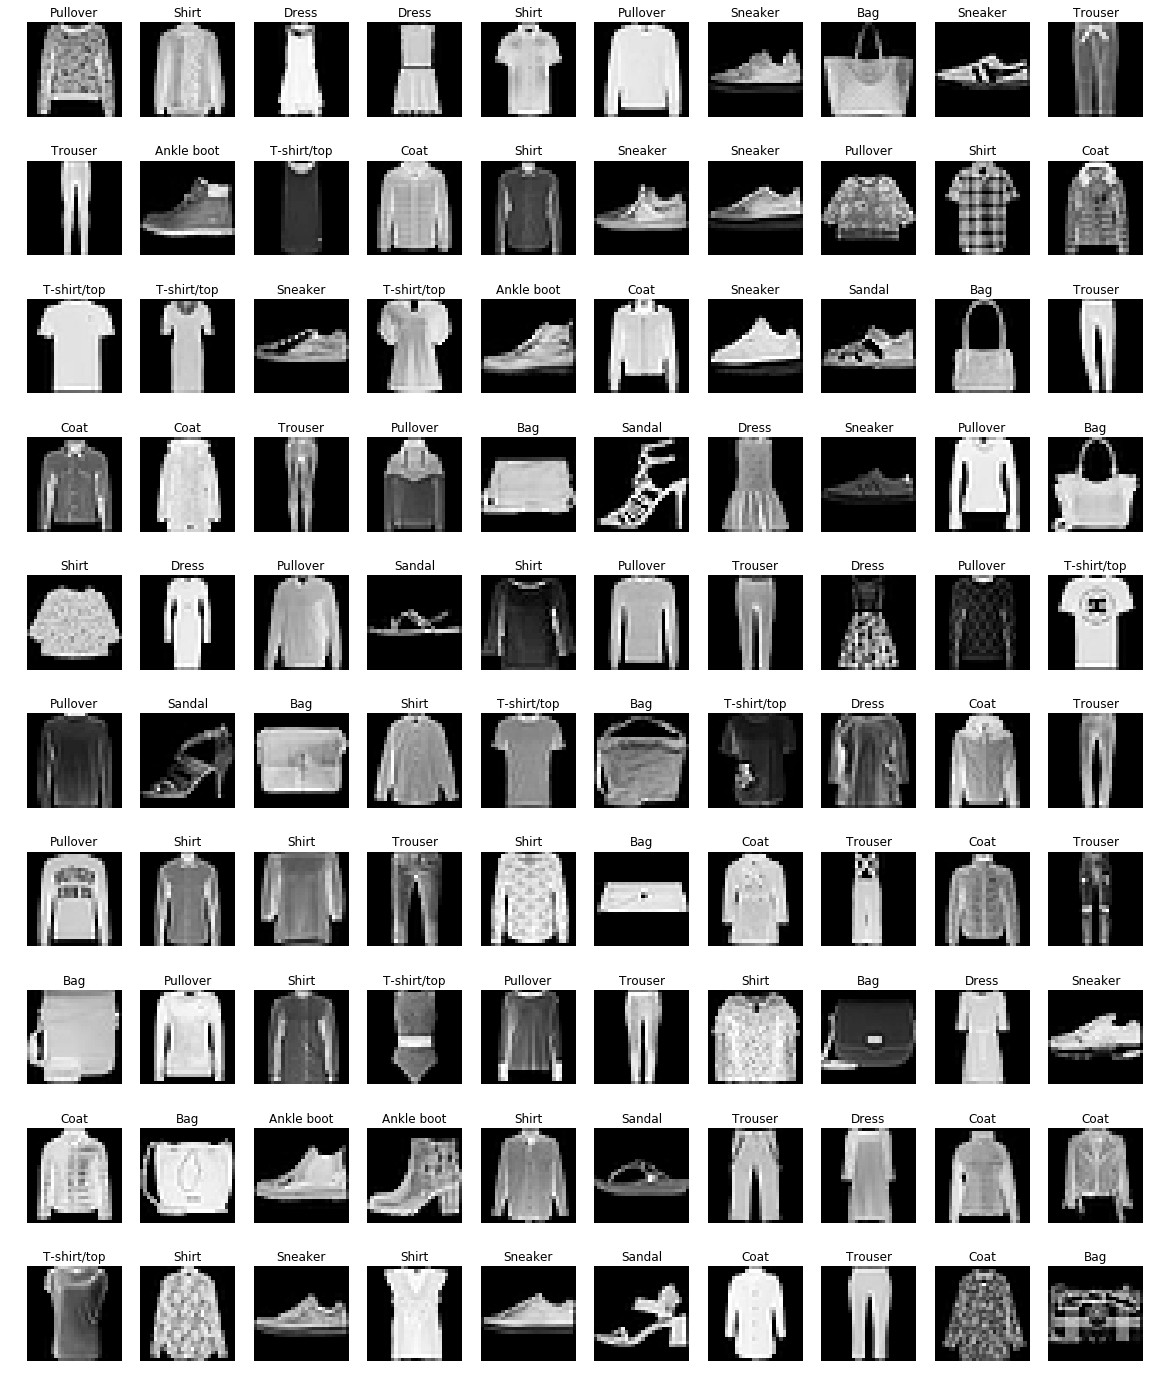

In [22]:
import matplotlib.pyplot as plt

plt.subplots_adjust(wspace=1.5, hspace=2.5)
fig = plt.figure(figsize=(20,25))

img_batch, label_batch = next(iter(train_loader))
img_batch = img_batch.squeeze(dim=1).numpy()
label_batch = label_batch.numpy()
for img_id in range(100):
    ax = plt.subplot(10, 10, img_id+1)
    img = img_batch[img_id]
    
    class_id = label_batch[img_id]
    class_name = train_dataset.classes[class_id]
    ax.imshow(img , cmap='gray')
    ax.set_title(class_name)
    ax.axes.set_axis_off()

### Validation data

In [23]:
from image_processing_workshop.visual import plot_image

In [24]:
valid_dataset = datasets.FashionMNIST('./dataset_fashion_mnist/', download=True, train=False, transform=transformations)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=64, shuffle=False)

In [25]:
len(valid_dataset)

10000

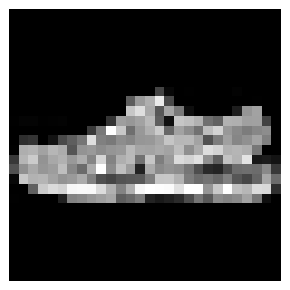

In [26]:
plot_image(valid_dataset[21][0], figsize=(5, 5))

In [27]:
labels = valid_dataset.targets
class_names = list(map(lambda class_id: valid_dataset.classes[class_id], labels))
df = pd.DataFrame({'class_names': class_names, 'class_ids': labels})
df.head(10)

,class_names,class_ids
0,Ankle boot,9
1,Pullover,2
2,Trouser,1
3,Trouser,1
4,Shirt,6
5,Trouser,1
6,Coat,4
7,Shirt,6
8,Sandal,5
9,Sneaker,7


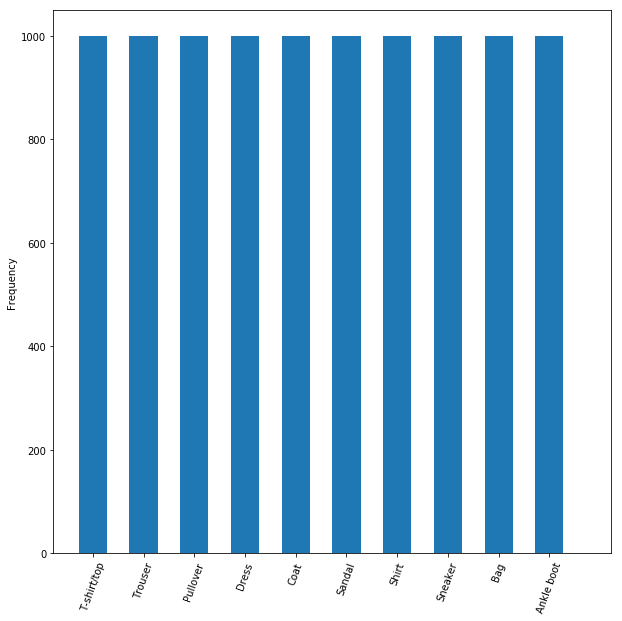

In [28]:
fig = plt.figure(figsize=(10, 10))
df.loc[:,'class_ids'].plot(kind='hist', width=0.5)
ax = plt.gca()
ax_ticks = ax.xaxis.set_ticks(np.arange(0.25, 9, 0.9))
ax_labels = ax.xaxis.set_ticklabels(list(valid_dataset.classes), rotation=70)